## AdaBoost Classifier on IRIS Dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


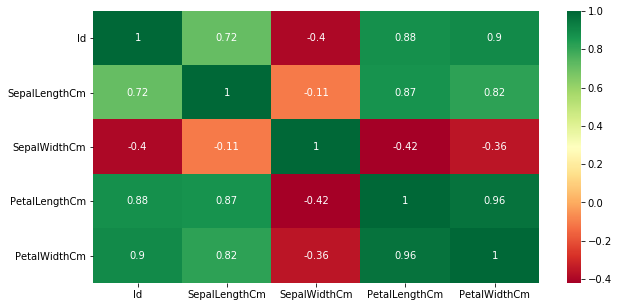

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(),annot=True,cmap='RdYlGn')

In [3]:
#Extracting Features
X=iris.drop('Species',axis=1)
y=iris['Species']

In [4]:
#Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=41,stratify=y)

In [5]:
#Train the model
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [6]:
#Test the model
abc.score(X_test,y_test)

1.0

In [7]:
y_pred=abc.predict(X_test)

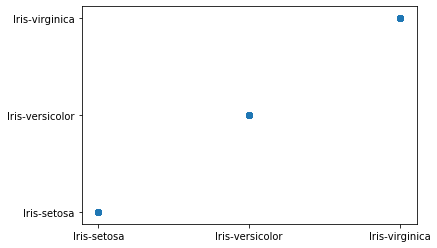

In [9]:
plt.scatter(y_test,y_pred)
plt.show()

## AdaBoost Regressor on Gapminder Dataset

In [14]:
df_gm=pd.read_csv('gapminder.csv')
df_gm.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [24]:
df_gm.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


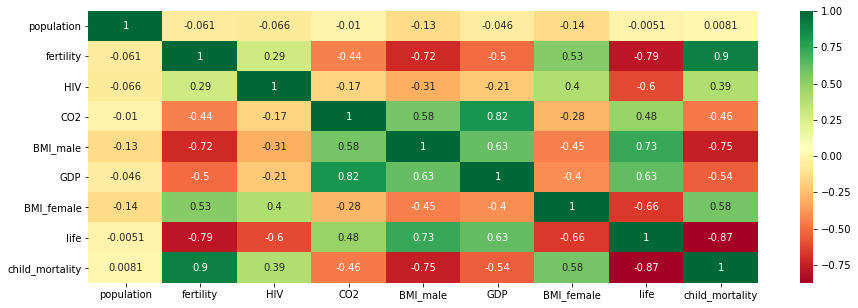

In [27]:
plt.figure(figsize=(15,5))
sns.heatmap(df_gm.corr(),annot=True,cmap='RdYlGn')

In [15]:
#Extracting Features
X=df_gm.drop('fertility',axis=1)
y=df_gm['fertility']

In [16]:
#Converting categotical feature into numerical
X=pd.get_dummies(X,drop_first=True)
X.head()

,population,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [17]:
#Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=21)

In [18]:
#Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [19]:
#Train the model
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [20]:
#Test the model
abr.score(x_test,y_test)

0.8971757767247195

In [21]:
y_pred=abr.predict(x_test)

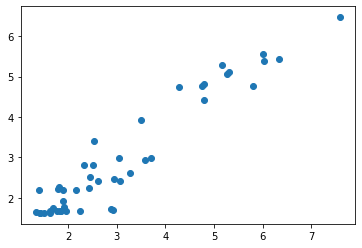

In [22]:
plt.scatter(y_test,y_pred)
plt.show()